### Working with trees

Next to making histograms, working with trees is probably the most common part of any analysis. The TTree implementation uses pointers and dedicated buffers to reduce the memory usage and to speed up access. Consequently, mapping TTree functionality to Python is not straightforward, and most of the following features are implemented in ROOT release 4.01/04 and later only, whereas you will need 5.02 if you require all of them.

#### Accessing an Existing Tree

Let us assume that you have a file containing TTrees, TChains, or TNtuples and want to read the contents for use in your analysis code. This is commonly the case when you work with the result of the reconstruction software of your experiment (e.g. the combined ntuple in ATLAS). The following example code outlines the main steps (you can run it on the result of the tree1.C macro):

In [70]:
from ROOT import TChain, TFile

# open the file
chain = TChain("events");
chain.Add("files/data.root")

entries = chain.GetEntries()
print "number of events = ", entries

for i in xrange(entries):
    chain.GetEntry(i)
    print "number of muons = ", chain.NMuon
    if chain.NMuon > 0:
        print "muon px = ", chain.Muon_Px[0], ", py = ", chain.Muon_Py[0], ", pz = ", chain.Muon_Pz[0] 
        break

number of events =  469384
number of muons =  1
muon px =  4.85949611664 , py =  -30.2398738861 , pz =  137.776489258


##### answer:
```
number of events =  469384
number of muons =  1
muon px =  4.85949611664 , py =  -30.2398738861 , pz =  137.776489258
```

We can print out only two decimal as we don't really need that much precision above.

In [73]:
from ROOT import TChain, TFile

# open the file
chain = TChain("events");
chain.Add("files/data.root")

entries = chain.GetEntries()
print "number of events = ", entries

for i in xrange(entries):
    chain.GetEntry(i)
    print "number of muons = ", chain.NMuon
    if chain.NMuon > 0:
        # print out only two decimal : 3 lines
        px = "%.2f" % chain.Muon_Px[0]
        py = "%.2f" % chain.Muon_Py[0]
        pz = "%.2f" % chain.Muon_Pz[0]
        print "muon px = ", px, ", py = ", py, ", pz = ", pz 
        break

number of events =  469384
number of muons =  1
muon px =  4.86 , py =  -30.24 , pz =  137.78


##### answer:
```
number of events =  469384
number of muons =  1
muon px =  4.86 , py =  -30.24 , pz =  137.78
```

#### Writing a Tree

We will create a new variable of mass and save it into output file. The new variable is the mass which is defined as $M= \sqrt{ E^2 - P^2 }$

In [93]:
from ROOT import TChain, TFile
import math

# open the file
chain = TChain("events");
chain.Add("files/data.root")

entries = chain.GetEntries()

for i in xrange(entries):
    chain.GetEntry(i)
    #we will calculate the mass using Einstein energy-momentum relation, E**2 = p**2 + m**2
    if chain.NMuon > 0:
        px = chain.Muon_Px[0]
        py = chain.Muon_Py[0]
        pz = chain.Muon_Pz[0]
        e = chain.Muon_E[0]
        mass = math.sqrt(e**2 - px**2 - py**2 - pz**2)
        print "muon px = %.2f" % px, ", py = %.2f" % py, ", pz = %.2f" % pz, ", mass = %.2f" % mass
        break

muon px = 4.86 , py = -30.24 , pz = 137.78 , mass = 0.12


##### answer:
```
muon px = 4.86 , py = -30.24 , pz = 137.78 , mass = 0.12
```

The muon mass is 0.106 MeV. So it is not exactly the same but very similar. What would be the reason why it is not exactly the same? 

In [32]:
from ROOT import TChain, TFile
from ROOT import TTree
from array import array
import math

# open the file
chain = TChain("events");
chain.Add("files/data.root")

# create a new file that will contain the new variable, muon_mass
f = TFile( 'output.root', 'RECREATE')
t = TTree( 'tree', 'muon study')
muon_mass = array( 'd', [0] )
t.Branch('muon_mass', muon_mass, 'muon_mass/D')    

entries = chain.GetEntries()

for i in xrange(entries):
    chain.GetEntry(i)
    #addtionally we will print out the process rate with following three lines
    #every 100000 events, we check how much it was processed
    process = float(i)/float(entries) * 100
    if i%100000 == 0:
        print "processed = %.0f" % process,"%"
    #we will calculate the mass using Einstein energy-momentum relation, E**2 = p**2 + m**2
    if chain.NMuon > 0:
        px = chain.Muon_Px[0]
        py = chain.Muon_Py[0]
        pz = chain.Muon_Pz[0]
        e = chain.Muon_E[0]
        m2 = e**2 - px**2 - py**2 - pz**2
        # following lines are for saving new variable in new root file
        if m2 > 0:
            mass = math.sqrt(e**2 - px**2 - py**2 - pz**2)
            muon_mass[0] = mass
            t.Fill()
            continue
print "done"
f.Write()
f.Close()    

processed = 0 %
processed = 21 %
processed = 43 %
processed = 64 %
processed = 85 %
done


##### answer:
```
processed = 0 %
processed = 21 %
processed = 43 %
processed = 64 %
processed = 85 %
done
```

In [36]:
!ls *.root

output.root


Can you open the newly created root file and access to the new variable, **muon_mass** and print out every 100000th events?

In [40]:
from ROOT import TChain, TFile

# open the file
chain = TChain("tree");
chain.Add("output.root")

entries = chain.GetEntries()
print "total number of events = ", entries
for i in xrange(entries):
    # require one line to read event information, please see above if you are not sure
    if i%100000 == 0:
        #print out the new variable
        print "muon mass = "
print "done"

total number of events =  241918
muon mass =  0.116012407528
muon mass =  0.104943080381
muon mass =  0.105613876053
done


##### answer

```
total number of events =  241918
muon mass =  0.116012407528
muon mass =  0.104943080381
muon mass =  0.105613876053
done
```

Now we will fill the histogram with this new variable

total number of events =  241918
muon mass =  0.116012407528
muon mass =  0.104943080381
muon mass =  0.105613876053
done


Warning in <TROOT::Append>: Replacing existing TH1: h_mass (Potential memory leak).


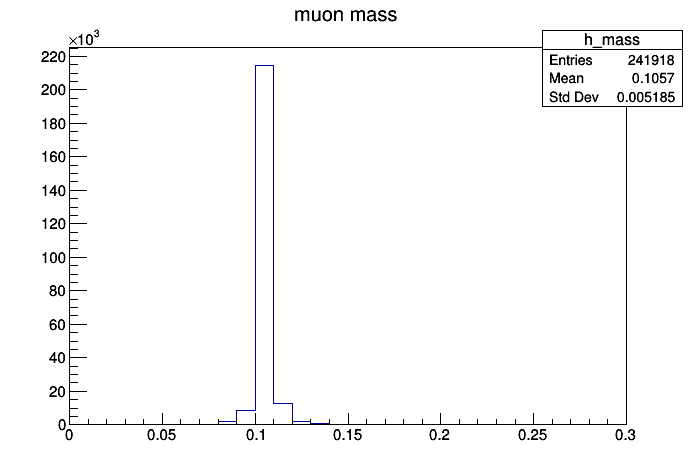

In [48]:
from ROOT import TChain, TFile, TH1F, TCanvas

# open the file
chain = TChain("tree");
chain.Add("output.root")

#create histogram object in the range from 0 to 0.3 with 30 bins

entries = chain.GetEntries()
print "total number of events = ", entries
for i in xrange(entries):
    # need around 4 lines including the lines that are required in the previous example
   
print "done"
c = TCanvas()
h_mass.Draw()
c.Draw()

##### answer

```
total number of events =  241918
muon mass =  0.116012407528
muon mass =  0.104943080381
muon mass =  0.105613876053
done
```

<img src="muonmass.png">

#### Dimuon mass 

We will create a new variable for dimuon mass. We will do the vector sum of two muons. 

For this, we need to make sure if there are at least two muons per event.
```python
    if chain.NMuon > 1:
```

In [42]:
from ROOT import TChain, TFile
from ROOT import TTree
from array import array
import math

# open the file
chain = TChain("events");
chain.Add("files/data.root")

f = TFile( 'output2.root', 'RECREATE')
t = TTree( 'tree', 'muon study')
dimuon_mass = array( 'd', [0] )
t.Branch('dimuon_mass', dimuon_mass, 'dimuon_mass/D')    

entries = chain.GetEntries()

for i in xrange(entries):
    chain.GetEntry(i)
    process = float(i)/float(entries) * 100
    if i%100000 == 0:
        print "processed = %.0f" % process,"%"
    #we will calculate the mass using Einstein energy-momentum relation, E**2 = p**2 + m**2
    if chain.NMuon > 1:
        # print out only two decimal : 3 lines
        px1 = chain.Muon_Px[0]
        py1 = chain.Muon_Py[0]
        pz1 = chain.Muon_Pz[0]
        e1 = chain.Muon_E[0]
        px2 = chain.Muon_Px[1]
        py2 = chain.Muon_Py[1]
        pz2 = chain.Muon_Pz[1]
        e2 = chain.Muon_E[1]
        m2 = (e1+e2)**2 - (px1+px2)**2 - (py1+py2)**2 - (pz1+pz2)**2
        if m2 > 0:
            mass = math.sqrt(m2)
            dimuon_mass[0] = mass
            t.Fill()
            continue
print "done"
f.Write()
f.Close()    

processed = 0 %
processed = 21 %
processed = 43 %
processed = 64 %
processed = 85 %
done


Now we will repeat the same thing for the new variable, in this time, **dimuon_mass**. Can you write a code to read the dimuon_mass and print out the variable every 100000th events and fill the histogram with this variable and draw?

total number of events =  18708
muon mass =  88.9468251097
done


Warning in <TROOT::Append>: Replacing existing TH1: h_mass (Potential memory leak).


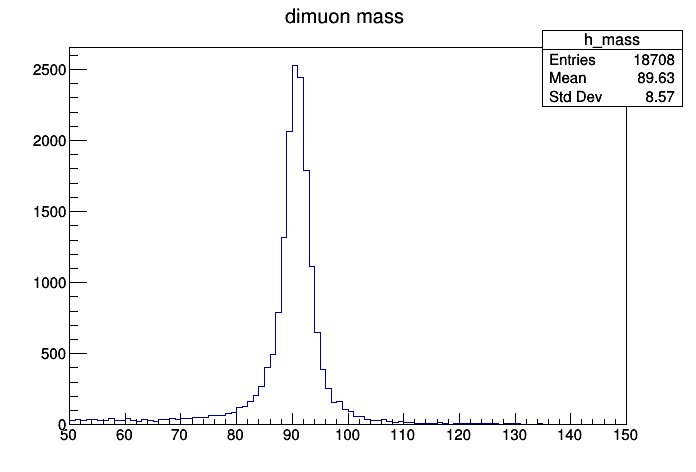

In [50]:
from ROOT import TChain, TFile

# open the file
chain = TChain("tree");
chain.Add("output2.root")

#need one line to create histogram object

entries = chain.GetEntries()
print "total number of events = ", entries
for i in xrange(entries):
    #need one line to read event information

    #need around one line to fill the histogram
    if i%100000 == 0:
        #and print out
        print "muon mass = "
print "done"
c = TCanvas()
h_mass.Draw()
c.Draw()

##### answer:

```
total number of events =  18708
muon mass =  88.9468251097
done
```

<img src="dimuonmass.png">